In [14]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range
from scipy.stats import beta

In [7]:
## Constants
numb_of_trials = 10_000
bandit_probabilities = [0.2, 0.5, 0.75]

In [22]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.N = 0
        self.a = 1
        self.b = 1

    def pull(self):
        return np.random.random() < self.p

    def update(self, result_of_pull):
        self.N += 1
        self.a += result_of_pull
        self.b += 1 - result_of_pull

In [31]:
def bayesian_plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Real p: {b.p:.4f}, Win Rate = {b.a-1}/{b.N}")
    
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

In [32]:
def bayesian_experiment():
    bandits = [Bandit(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([bandit.p for bandit in bandits])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        chosen_bandit_index = np.argmax([beta.rvs(bandit.a, bandit.b, size=1) for bandit in bandits])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = bandits[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print("Optimal Runs:", num_optimal)
    print("Bandits' Parameters' Estimates:", [(bandit.a, bandit.b) for bandit in bandits])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    bayesian_plot(bandits, numb_of_trials)

Optimal j: 2
Optimal Runs: 9908
Bandits' Parameters' Estimates: [(3, 9), (48, 36), (7379, 2531)]
Reward Percentage:  0.7427


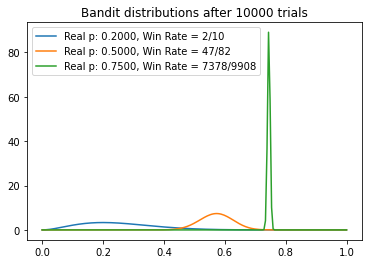

In [33]:
bayesian_experiment()